# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


## Multiple Linear Regression model 



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Read in the data set
data = pd.read_csv('ames.csv')
data.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [3]:
data.shape


(2930, 14)

## Data Inspection and Pre-Processing (if necessary)

In [4]:
# Missing data check
data.isnull().sum()

Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

In [5]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB


In [6]:
# Data stats
data.describe()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1971.356314,1984.266553,1051.255631,1159.557679,335.455973,1499.690444,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,472.658362,180796.060068
std,30.245361,20.860286,440.968018,391.890885,428.395715,505.508887,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,215.187196,79886.692357
min,1872.000000,1950.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,12789.000000
25%,1954.000000,1965.000000,793.000000,876.250000,0.000000,1126.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,320.000000,129500.000000
50%,1973.000000,1993.000000,990.000000,1084.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,480.000000,160000.000000
75%,2001.000000,2004.000000,1301.500000,1384.000000,703.750000,1742.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,576.000000,213500.000000
max,2010.000000,2010.000000,6110.000000,5095.000000,2065.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1488.000000,755000.000000


## Exploratory Data Analysis 

We will examine the relationship between all variables to understand overall patterns, and then focus on the distributions and potentail outliers of 'Gr_Liv_Area' and 'Garage_Area` before analysing data trends in more detail. 


array([[<Axes: title={'center': 'Year_Built'}>,
        <Axes: title={'center': 'Year_Remod_Add'}>,
        <Axes: title={'center': 'Total_Bsmt_SF'}>,
        <Axes: title={'center': 'First_Flr_SF'}>],
       [<Axes: title={'center': 'Second_Flr_SF'}>,
        <Axes: title={'center': 'Gr_Liv_Area'}>,
        <Axes: title={'center': 'Full_Bath'}>,
        <Axes: title={'center': 'Half_Bath'}>],
       [<Axes: title={'center': 'Bedroom_AbvGr'}>,
        <Axes: title={'center': 'Kitchen_AbvGr'}>,
        <Axes: title={'center': 'TotRms_AbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>],
       [<Axes: title={'center': 'Garage_Area'}>,
        <Axes: title={'center': 'Sale_Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

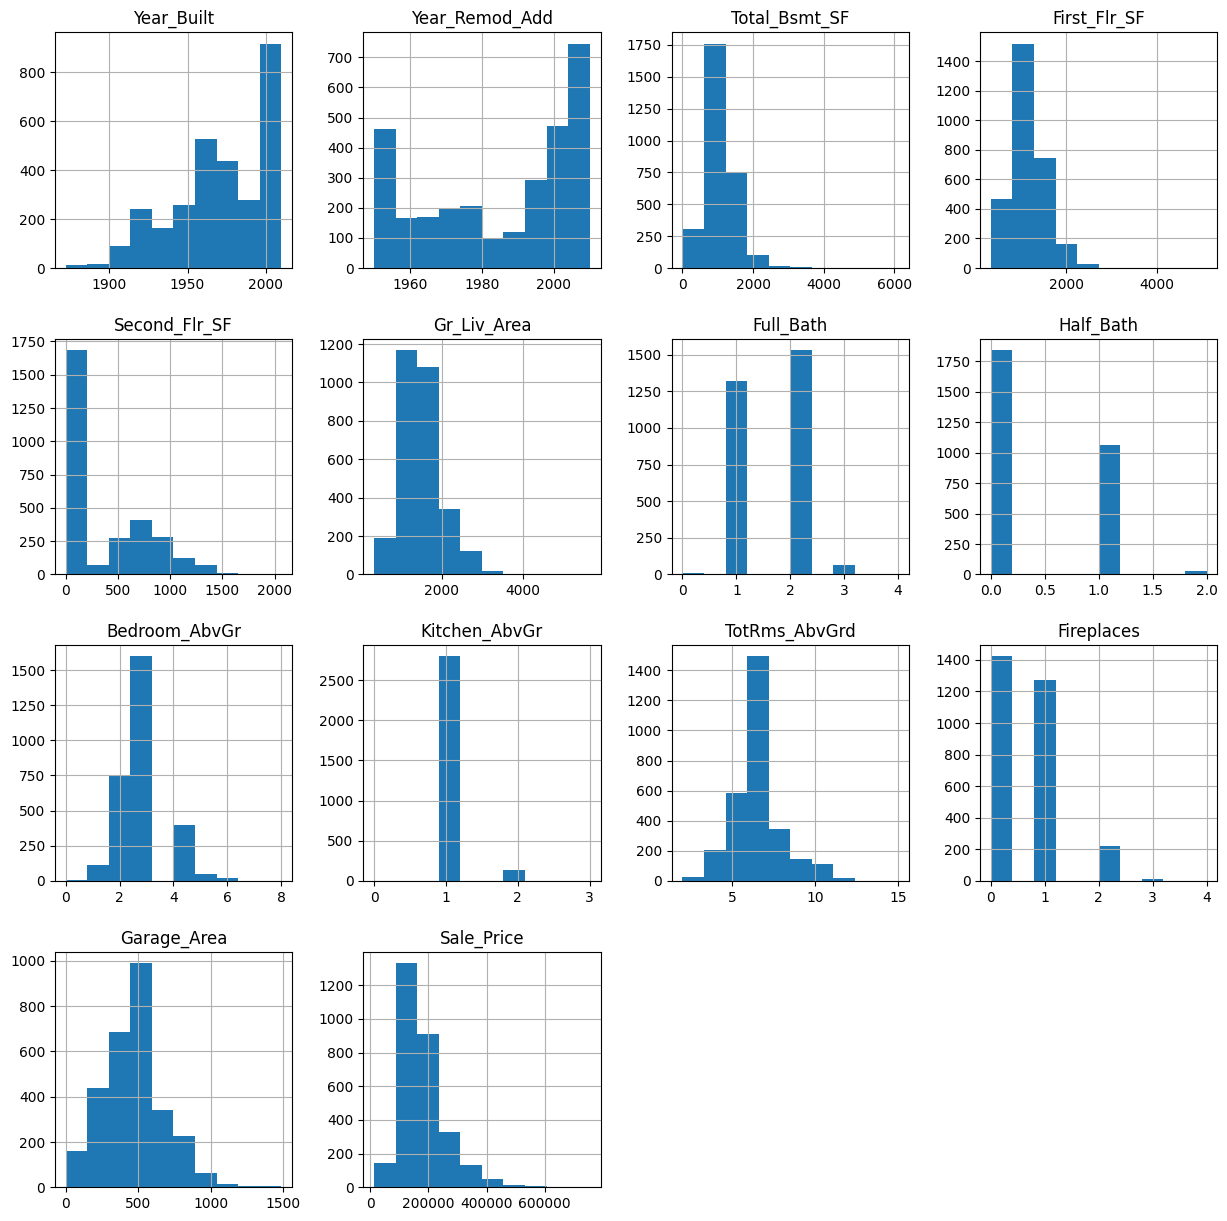

In [7]:
# Oveview of distributions, missing values, outliers of all 14 features in the dataset
data.hist(figsize=(15,15))

Let us look at detailed boxplots and stats for three core variables 'Gr_Liv_Are',a 'Garage_Area'and 'Sale_Price'

In [8]:
# Stas calculations ('Gr_Liv_Area')
liv_area = data['Gr_Liv_Area']
liv_area_Q1 = np.percentile(liv_area, 25)
liv_area_Q3 = np.percentile(liv_area, 75)
liv_area_median = np.median(liv_area)
liv_area_IQR = liv_area_Q3 - liv_area_Q1
lower_liv_whisker = liv_area_Q1 - 1.5 * liv_area_IQR
upper_liv_whisker = liv_area_Q3 + 1.5 * liv_area_IQR

print('Liv_Area_Q1:', liv_area_Q1)
print('Liv_Area_Q3:', liv_area_Q3)
print('Liv_Area_median:', liv_area_median)
print('Liv_Area_IQR:', liv_area_IQR)
print('Lower_liv_whisker:', lower_liv_whisker)
print('Upper_liv_whisker:', upper_liv_whisker)

Liv_Area_Q1: 1126.0
Liv_Area_Q3: 1742.75
Liv_Area_median: 1442.0
Liv_Area_IQR: 616.75
Lower_liv_whisker: 200.875
Upper_liv_whisker: 2667.875


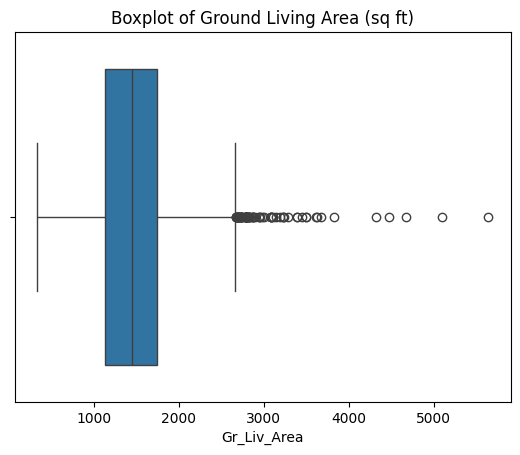

In [9]:
# Boxplot for visualisation ('Gr_Liv_Area')
sns.boxplot(x=data['Gr_Liv_Area'])
plt.title('Boxplot of Ground Living Area (sq ft)')
plt.xlabel('Gr_Liv_Area')
plt.show()


About 50% of properties have living areas between 1126 and 1743 sq ft. with a median of 1442 sq ft. 
A small number of outliers extend to 5000 sqft, but they represent less than 2% of the total dataset.

In [10]:
# Stats calculations ('Garage_Area')
gar_area = data['Garage_Area']
gar_area_Q1 = np.percentile(gar_area, 25)
gar_area_Q3 = np.percentile(gar_area, 75)
gar_area_median = np.median(gar_area)
gar_area_IQR = gar_area_Q3 - gar_area_Q1
lower_gar_whisker = gar_area_Q1 - 1.5 * gar_area_IQR
upper_gar_whisker = gar_area_Q3 + 1.5 * gar_area_IQR

print('Garage_Area_Q1:', gar_area_Q1)
print('Garage_Area_Q3:', gar_area_Q3)
print('Garage_Area_median:', gar_area_median)
print('Garage_Area_IQR:', gar_area_IQR)
print('Lower_Gar_whisker:', lower_gar_whisker)
print('Upper_Gar_whisker:', upper_gar_whisker)

Garage_Area_Q1: 320.0
Garage_Area_Q3: 576.0
Garage_Area_median: 480.0
Garage_Area_IQR: 256.0
Lower_Gar_whisker: -64.0
Upper_Gar_whisker: 960.0


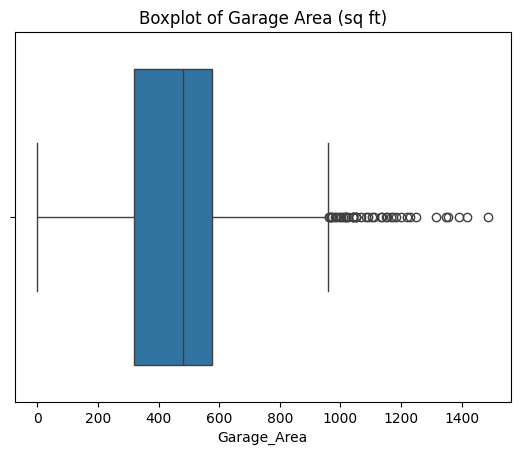

In [11]:
# Boxplot for visualisation ('Garage_Area')
sns.boxplot(x=data['Garage_Area'])
plt.title('Boxplot of Garage Area (sq ft)')
plt.xlabel('Garage_Area')
plt.show()

About 50% of properties have garage area between 320 and 576 sq ft with a median of 480 sq ft. 
A small number of outliers extend to 1500 sqft but outliers represent less than 2% of data.


Because the two feature values are on different scales we will standardise the data before deploying the multiple regression model.

In [12]:
# Stats calculations ('Sale_Price')
sale_price = data['Sale_Price']
sale_price_Q1 = np.percentile(sale_price, 25)
sale_price_Q3 = np.percentile(sale_price, 75)
sale_price_median = np.median(sale_price)
sale_price_IQR = sale_price_Q3 - sale_price_Q1
lower_sp_whisker = sale_price_Q1 - 1.5 * sale_price_IQR
upper_sp_whisker = sale_price_Q3 + 1.5 * sale_price_IQR

print('Sale_Price_Q1:', sale_price_Q1)
print('Sale_Price_Q3:', sale_price_Q3)
print('Sale_Price_median:', sale_price_median)
print('Sale_Price_IQR:', sale_price_IQR)
print('Sale_Price_whisker:', lower_sp_whisker)
print('Sale_Price_whisker:', upper_sp_whisker)

Sale_Price_Q1: 129500.0
Sale_Price_Q3: 213500.0
Sale_Price_median: 160000.0
Sale_Price_IQR: 84000.0
Sale_Price_whisker: 3500.0
Sale_Price_whisker: 339500.0


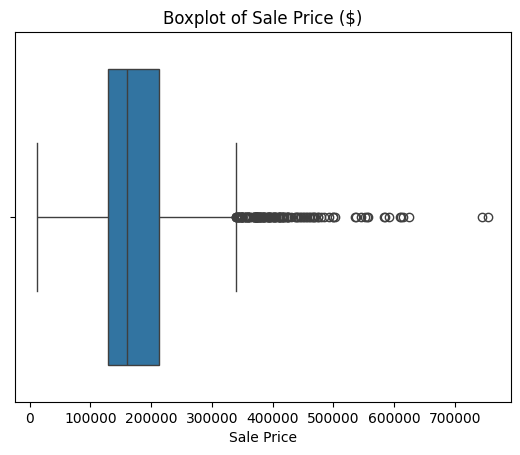

In [13]:
# Boxplot for visualisation ('Sale_Price')
sns.boxplot(x=data['Sale_Price'])
plt.title('Boxplot of Sale Price ($)')
plt.xlabel('Sale Price')
plt.show()

About 50% of properties in the dataset are priced between $129,500 and $213,500 with a median of 
$160,000. A small number of outliers extend to $700,000 and above, but the outliers are not significant, representing less than 5% of all properties (mostly very expensive houses above $339,500).

## Multiple Linear Regression of Sale Price Based on Living Area and Garage Area

In [14]:
# Split the independent variables from the dependent variable
X = data[['Gr_Liv_Area', 'Garage_Area']]
y = data['Sale_Price']

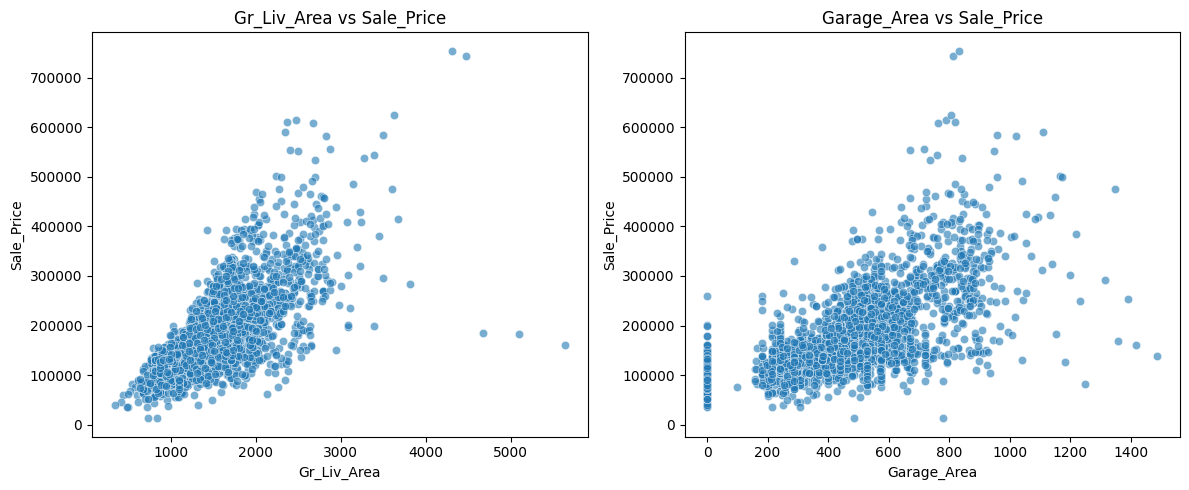

In [15]:
# Explore relationships between the independent and dependent variables
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(x='Gr_Liv_Area', y='Sale_Price', data=data, ax=axes[0], alpha=0.6)
axes[0].set_title('Gr_Liv_Area vs Sale_Price' )

sns.scatterplot(x='Garage_Area', y='Sale_Price', data=data, ax=axes[1], alpha=0.6)
axes[1].set_title('Garage_Area vs Sale_Price' )

plt.tight_layout()
plt.show()


The scatterplt of 'Gr_Liv_Area vs Sale_Price' shows a strong upward trend, indicating a clear linear relathionship. By contrast, 'Garage_Area vs Sale_Price' displyas a weaker upward trend with a broader spread of points and noticable outliers, suggesting that garage area is less consistent predictor of sale price compared to living area. 

In [16]:
# Create a training and test set with a 75:25 split ratio
X = data[['Gr_Liv_Area', 'Garage_Area']]
y = data['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
)
print('Training data:',X_train.shape, y_train.shape)
print('Test data:',X_test.shape, y_test.shape)

Training data: (2197, 2) (2197,)
Test data: (733, 2) (733,)


In [17]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
model = LinearRegression()
model.fit(X_train,y_train)

# Print the model intercept and coefficients on raw (unscaled)predictors
print('Intercept:', model.intercept_)
print('Coefficients:\n',model.coef_)

Intercept: -5059.448195610312
Coefficients:
 [ 78.69286848 141.14571761]


Intercept indicates sale price when both predictors are 0, which is unrealistic therefore,not meaningful.

Coefficient for Gr_Liv_Area (78.69): For every 1 sqft increase in above-grade living area, the predicted sale price increases by about $78.70, holding garage area constant. 

In relation to the median Sale Price - adding a living room of 500 sq ft will increase the predicted price by about $39,000, which is ~ 24% of the median house price ($160,000).

Coefficient for Garage_Area (141): For every one additional sqft of garage area, the predicted sale price increases by about $141.15, holding living area constant.

In relation to the median Sale Price - adding a garage of 200 sq ft, will increase the predicted house price by about 28,000, which is ~ 17% of the median house price ($160,000).

We will now scale the predictors as they are on different physical scales ('000 to'00) and then compare coefficients and effect of each predictor on the sale price.

The two predictor feature data follows a Gaussian distribution (histogram above). So, we will standardise our data using StandardScaler. We will fit it on the training set only.

In [18]:
# Scale predictors
scale = StandardScaler()
scale.fit(X_train)

# Apply the scaler on both train and test data
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [19]:
# Build a multiple linear regression model using scaled predictors:'Gr_Liv_Area' and 'Garage_Area'
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_predict = mlr.predict(X_test)

print('Intercept:', mlr.intercept_)
print('Coefficients: \n', mlr.coef_)


Intercept: 179066.78197542104
Coefficients: 
 [40156.97174031 30009.56807696]


Intercept (~179,067): this is the predicted average sales price when both predictors are at their mean values (since after scaling, the mean of each predictor is 0). This makes sense, it is close to the dataset average house price.

Coefficient for Gr_Liv_Area (40,157): A 1 standard deviation increase in living area (~500-600 sqft in this dataset) is associated with the sale price increase of $40,157, holding garage area constant.

Coefficient for Garage_Area (30,010): A 1 standard deviation increase in garage area (~200-250 sqft) is associated with an increase of about $30,010 in sale price, holding living area constant.

Comparison to the raw model:

Raw coefficients and their effect on the target are hard to compare directly, since a garage and a living room arent on the same physical scale.

Scaled coefficients:
Living area - strongest driver of price (+$40k)
Garage area - still important but weaker(+$30k)
Now the relative importance is clearer: living area matters more than garage size.


In [20]:
# Generate predictions for the test set
mlr_predict = mlr.predict(X_test)
mlr_predict[0:5]

array([158224.09430889, 113256.67578876, 217552.81911301,  72846.49160079,
        94782.71287234])

In [21]:
# Evaluate the model
mlr_predict = mlr.predict(X_test)
# Mean Squared Error
mse = mean_squared_error(y_test, mlr_predict)
# Root Mean Squared Error
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 2634371879.690211
Root Mean Squared Error (RMSE): 51326.13252223677


The model achieved a Root Mean Squared Error (RMSE) of approximately $51,000 on the test set. This means that on average, the model's predictions are about $51k away from the true sale price. 
The average house price in the dataset is around $180,000, this means the model's predictions are off by about 28%. This indicates that while model captures part of the relationship, there is still unexplained variation, likely due to omitted features beyond living area and garage area.  

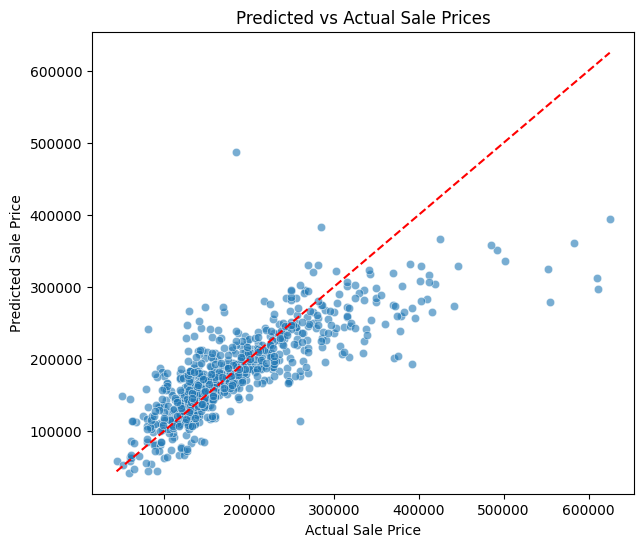

In [22]:
# Generate an error plot to visualise the differences between predicted and actual values
# in the test set.
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=mlr_predict, alpha=0.6) # prediction plot based on test data
limits = [y_test.min(), y_test.max()]
plt.plot(limits,limits, color="red", linestyle="--") # reference line (perfect prediction)

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Predicted vs Actual Sale Prices")
plt.show()


## Summary of Findings
#### Exploratory Data Analysis (EDA):
* Sale Price is right-skewed with a median of $160,000. About 4.7% of properties are outliers, mostly very high_priced homes.
* Living Area shows a strong linear relationship with Sale Price, while Garage Area has a weaker but still positive trend.
* Outliers in both predictors are limited (less than 3%), and distributions are consistent with realistic housing characteristics.
#### Model Results:
* The multiple linear regression model was fit with Gr_Liv_Area and Garage_Area as predictors.
* On the test set the model achieved an RMSE of ~$51,000, which means predictions are on average about $51k away from true sale prices.
* This is roughly 28% of the median house price, suggesting that the model captures some but not all variability in housing prices.
#### Coefficient Interpretation: 
* Scaled model: A 1 SD increase in living area (+$40)has a stronger effect than a 1 SD increase in garage (+$30), confirming that living space is the more influential predictor.
* Raw model: Adding 500 sq ft of living space increases predicted price by ~$39,000(~24% of median price). Adding a 200 sq ft garage increases predicted price by ~$28,000(~17% of median).
#### Other Observations:
* The model is limited because it only uses two predictors, while house prices depend on many additional variables (eg year built, bathrooms, location).
* Despite this, the analysis highlights that living area is the dominant factor in predicting house prices, with garage size contributing to a lesser degree.


